# SVM

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score
import time
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier

In [3]:
# Import dataframe from JSON file
jsonStr = "full_parameters_df.json"
df = pd.read_json(jsonStr, orient ='index')
print(df.tail)

<bound method NDFrame.tail of                                                    red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   
...                                                ...     ...     ...   
data/13666/1/13666_idx5_x901_y1101_class1.png   2.1980  2.3572  2.7020   
data/13666/1/13666_idx5_x1051_y1001_class1.png  2.6968  2.4552  2.5280   
data/13666/1/13666_idx5_x1051_y1151_class1.png  2.4272  2.8244  2.5152   
data/13666/1/13666_idx5_x1051_y1051_class1.png  2.5724  2.3860  2.5444   
data/13666/1/13666_idx5_x901_y1151_class1.png   2.7212  2.7648  3.0000   

                                                    gray  gray_var  edges  \
data

In [4]:
X= df[['red','green','blue','gray','gray_var','edges','ridges']]
y= df['group']

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, shuffle=False)

print('X_train : ')
print(X_train.head())
print(X_train.shape)
print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)
print('')
print('X_val : ')
print(X_val.head())
print(X_val.shape)
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)
print('')
print('y_val : ')
print(y_val.head())
print(y_val.shape)

X_train : 
                                                   red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   

                                                    gray  gray_var  edges  \
data/12910/0/12910_idx5_x3001_y701_class0.png   0.755730  0.003960     83   
data/12910/0/12910_idx5_x1501_y401_class0.png   0.483340  0.009377    350   
data/12910/0/12910_idx5_x2251_y1101_class0.png  0.799321  0.001401     14   
data/12910/0/12910_idx5_x2551_y1151_class0.png  0.824825  0.001107      0   
data/12910/0/12910_idx5_x2001_y101_class0.png   0.675241  0.005805    187   

                                                ridges  
data/12910/0/12910_idx5_

## SVM
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Youtube: https://www.youtube.com/watch?v=zEabrO9l1vg, https://www.youtube.com/watch?v=FB5EdxAGxQg

### Linear Kernel SVM
Tuning with the validation set and trying with different values of C, to afterwards use with the test set

In [ ]:
# Tuning linear kernel SVM, this takes very long time
st = time.time()

acc_c = []
for c in [0.1,0.5,1,5,10]:
    st0 = time.time()
    
    linear_model = svm.SVC(kernel='linear', C=c, decision_function_shape='ovo').fit(X_train, y_train)
    y_pred = linear_model.predict(X_val)
    
    accuracy_lin = accuracy_score(y_val, y_pred)
    acc_c.append(accuracy_lin)
    ConfusionMatrixDisplay.from_predictions(y_val,y_pred)
    et0 = time.time()
    elapsed0 = et0-st0
    print(c, accuracy_lin, elapsed0)
    
    
plt.plot([0.1,0.5,1,5,10], acc_c)
plt.show()

et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

In [ ]:
# Using C=?, this also takes a long time

st = time.time()

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

linear = svm.SVC(kernel='linear', C=100, decision_function_shape='ovo')
linear.fit(X_train, y_train)

X_test = scaler.transform(X_test)
linear_pred = rbf.predict(X_test)

# Accuracy
accuracy_lin = linear.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)

# Confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
ConfusionMatrixDisplay.from_predictions(y_test,linear_pred)
et = time.time()
print("Time: ", et-st)

### Radial Basis Function Kernel SVM
Tuning with the validation set and trying with different values of C, to afterwards use with the test set

0.1 0.7858923230309073 20.769062757492065
0.5 0.7858923230309073 20.878252029418945
1 0.7858923230309073 20.88246726989746
5 0.7858923230309073 23.412653923034668
10 0.7858923230309073 24.089492797851562


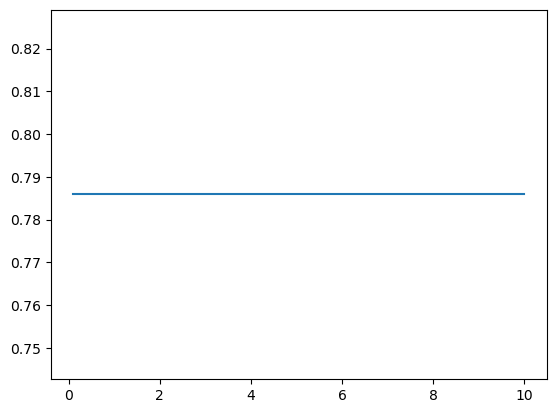

0.7858923230309073
Execution time: 110.27903270721436 seconds


In [4]:
# Tuning RBF kernel SVM. This takes shorter time, but the accuracy turns out to be the same whatever C is
st = time.time()

acc_c = []
for c in [0.1,0.5,1,5,10]:
    st0 = time.time()
    rbf_model = svm.SVC(kernel='rbf', C=c, decision_function_shape='ovo').fit(X_train, y_train)
    y_pred = rbf_model.predict(X_val)
    
    accuracy_rbf = accuracy_score(y_val, y_pred)
    
    acc_c.append(accuracy_rbf)
    et0 = time.time()
    elapsed0 = et0-st0
    print(c, accuracy_rbf, elapsed0)
    
plt.plot([0.1,0.5,1,5,10], acc_c)
plt.show()
print(max(acc_c))

et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Accuracy RBF Kernel: 0.8049545086028286


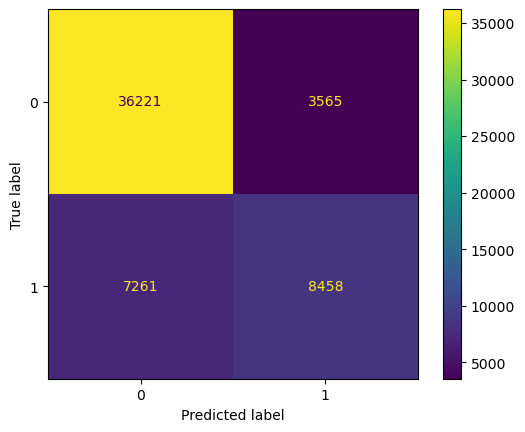

In [4]:
# RBF kernel with scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

rbf = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo')
rbf.fit(X_train, y_train)

X_test = scaler.transform(X_test)
rbf_pred = rbf.predict(X_test)

accuracy_rbf = rbf.score(X_test, y_test)
print('Accuracy RBF Kernel:', accuracy_rbf)

ConfusionMatrixDisplay.from_predictions(y_test,rbf_pred)
plt.show()

In [7]:
print(balanced_accuracy_score(y_test, rbf_pred))

0.724235278851276


### LinearSVC

/Users/julieschult/miniconda3/envs/malis/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


0.1 0.21251756566857638 12.841934204101562
0.5 0.21251756566857638 65.76607894897461
1 0.21251756566857638 134.09367871284485
5 0.21251756566857638 705.9262750148773
10 0.21251756566857638 2252.902354955673


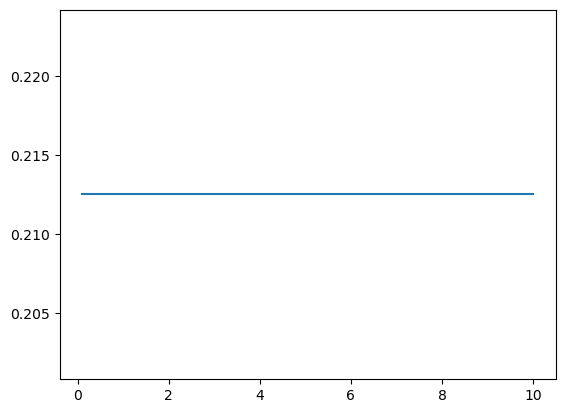

Execution time: 3172.107719898224 seconds


In [6]:
# Tuning. The runtime is not so long, but the accuracy turns out to be the same whatever C is
st = time.time()

acc_c = []
for c in [0.1,0.5,1,5,10]:
    st0 = time.time()
    
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)

    linSVC_model = LinearSVC(C=c, max_iter=300000)
    linSVC_model.fit(X_train, y_train)
    
    X_val = scaler.transform(X_val)
    y_pred = linSVC_model.predict(X_val)
    
    accuracy_lin = accuracy_score(y_val, y_pred)
    acc_c.append(accuracy_lin)
    #ConfusionMatrixDisplay.from_predictions(y_val,y_pred)
    
    et0 = time.time()
    elapsed0 = et0-st0
    print(c, accuracy_lin, elapsed0)
    
    
plt.plot([0.1,0.5,1,5,10], acc_c)
plt.show()

et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

0.7780019818034412
0.6928700585795434


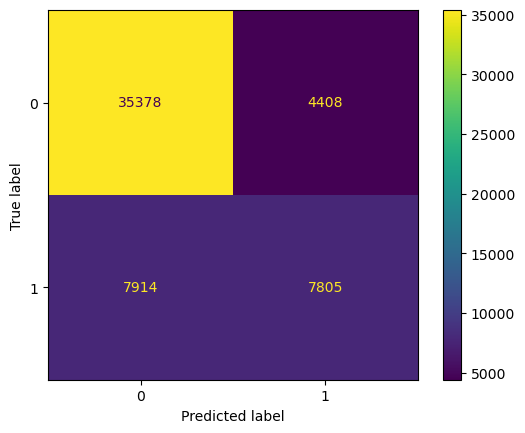

In [5]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

lin = LinearSVC(C=1,max_iter=300000)
lin.fit(X_train, y_train)


X_test = scaler.transform(X_test)
y_pred = lin.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
print(balanced_accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()